In [1]:
import pandas as pd
games=pd.read_csv('D:\Data Visualization\games.csv')
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
#import the seaborn library as set color codes
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [4]:
#Drop na values for negating issues during visualization
games.dropna(inplace=True)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81268 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81268 non-null  int64  
 1   type                  81268 non-null  object 
 2   name                  81268 non-null  object 
 3   yearpublished         81268 non-null  float64
 4   minplayers            81268 non-null  float64
 5   maxplayers            81268 non-null  float64
 6   playingtime           81268 non-null  float64
 7   minplaytime           81268 non-null  float64
 8   maxplaytime           81268 non-null  float64
 9   minage                81268 non-null  float64
 10  users_rated           81268 non-null  int64  
 11  average_rating        81268 non-null  float64
 12  bayes_average_rating  81268 non-null  float64
 13  total_owners          81268 non-null  int64  
 14  total_traders         81268 non-null  int64  
 15  total_wanters      

C:\Users\atrke\AppData\Local\Temp\ipykernel_12656\1769999763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(games['average_rating'])


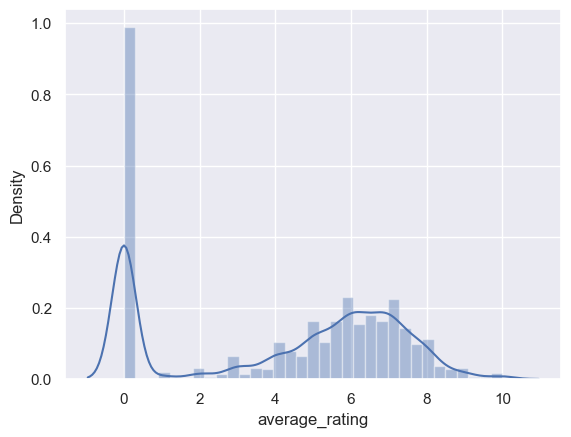

In [14]:
#View the distance plot for minage
sns.distplot(games['average_rating'])
plt.show()

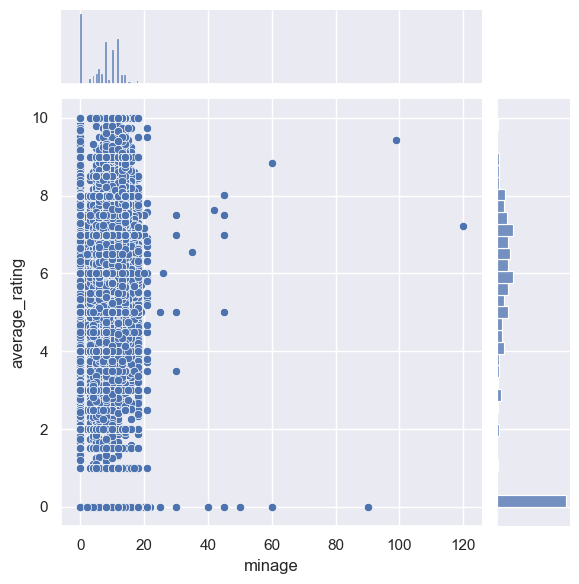

In [21]:
#Is there a linear relationship between Minage & average_rating?
sns.jointplot(games, x='minage',y='average_rating')
plt.show()

In [23]:
games[['minage','average_rating']].corr()

,minage,average_rating
minage,1.00000,0.24002
average_rating,0.24002,1.00000


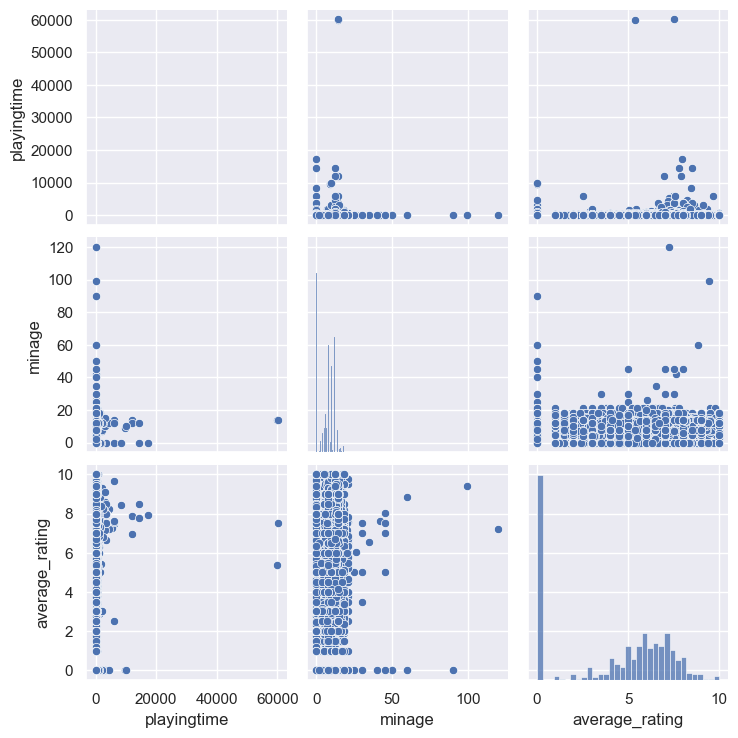

In [30]:
#Compare the relationship between playingtime, minage, average_rating using pairplot
sns.pairplot(games[['playingtime','minage','average_rating']])
plt.show()

In [31]:
games[['playingtime','minage','average_rating']].corr()

,playingtime,minage,average_rating
playingtime,1.000000,0.063106,0.053817
minage,0.063106,1.000000,0.240020
average_rating,0.053817,0.240020,1.000000


<AxesSubplot: xlabel='type', ylabel='playingtime'>

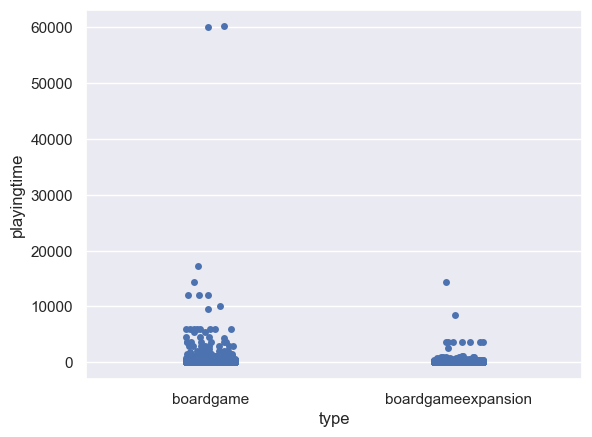

In [36]:
#Compare type of game and playingtime using stripplot
sns.stripplot(games,x='type',y='playingtime', jitter=True)

<AxesSubplot: xlabel='playingtime', ylabel='average_rating'>

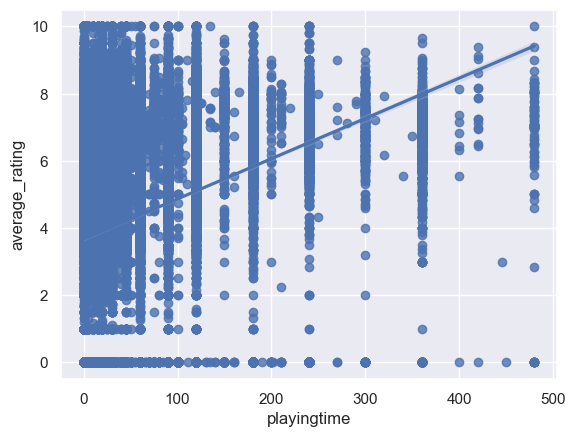

In [37]:
#Analyze the linear trend between playingtime(less than 500 mins) and average_rating received for the same
sns.regplot(games[games['playingtime']<500], x='playingtime',y='average_rating')